In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder

In [2]:
#Loading the dataset
Acc_in = pd.read_csv("/kaggle/input/state-ut-wise-road-accidents-due-to-driver-viola/driverresponse.csv")

**I am trying to find some patterns in the data using K means**

*Data Cleaning Process:*

In [3]:
Acc_in.head()

,index,sno,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,...,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,0,1,Andhra Pradesh,south,2,594,12747.0,507,328,668,...,154,1938,128,17286,40,667,325,1024,306,2868
1,1,2,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,...,0,22,15,45,0,7,11,8,8,18
2,2,3,Assam,northeast,5,613,4596.0,129,104,156,...,3,628,352,3520,64,334,156,371,3,873
3,3,4,Bihar,north,1,1680,1496.0,278,236,308,...,72,439,593,2323,8,458,156,573,122,612
4,4,5,Chhattisgarh,centre,9,335,6720.0,188,313,266,...,81,520,145,6660,62,410,175,467,144,953


In [4]:
Acc_in.shape

(36, 21)

In [5]:
Acc_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            36 non-null     int64  
 1   sno              36 non-null     int64  
 2   stateut          36 non-null     object 
 3   region           36 non-null     object 
 4   regionid         36 non-null     int64  
 5   alcintake2014    36 non-null     int64  
 6   overspeed2014    35 non-null     float64
 7   overtaking2014   36 non-null     int64  
 8   lanejumping2014  36 non-null     int64  
 9   wrongside2014    36 non-null     int64  
 10  signalavoid2014  36 non-null     int64  
 11  asleep2014       36 non-null     int64  
 12  othercause2014   36 non-null     int64  
 13  alcintake2016    36 non-null     int64  
 14  overspeed2016    36 non-null     int64  
 15  signalavoid2016  36 non-null     int64  
 16  wrongside2016    36 non-null     int64  
 17  lanejumping2016  3

By analysing the above details we could see that there is a null value on "OVERSPEED" data of 2014 : 

In [6]:
#For finding the null value 
Acc_in.isnull().sum()

index              0
sno                0
stateut            0
region             0
regionid           0
alcintake2014      0
overspeed2014      1
overtaking2014     0
lanejumping2014    0
wrongside2014      0
signalavoid2014    0
asleep2014         0
othercause2014     0
alcintake2016      0
overspeed2016      0
signalavoid2016    0
wrongside2016      0
lanejumping2016    0
overtaking2016     0
asleep2016         0
othercause2016     0
dtype: int64

In [7]:
#Droping out the null value
Data = Acc_in.dropna()
print ("Total number after dropig null values will be : ", len(Data))

Total number after dropig null values will be :  35


In [8]:
#removing index and sno columns from the data

Data = Data.drop(['index','sno'], axis=1)


In [9]:
#Now we can see that the null value have been removed 
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 35
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stateut          35 non-null     object 
 1   region           35 non-null     object 
 2   regionid         35 non-null     int64  
 3   alcintake2014    35 non-null     int64  
 4   overspeed2014    35 non-null     float64
 5   overtaking2014   35 non-null     int64  
 6   lanejumping2014  35 non-null     int64  
 7   wrongside2014    35 non-null     int64  
 8   signalavoid2014  35 non-null     int64  
 9   asleep2014       35 non-null     int64  
 10  othercause2014   35 non-null     int64  
 11  alcintake2016    35 non-null     int64  
 12  overspeed2016    35 non-null     int64  
 13  signalavoid2016  35 non-null     int64  
 14  wrongside2016    35 non-null     int64  
 15  lanejumping2016  35 non-null     int64  
 16  overtaking2016   35 non-null     int64  
 17  asleep2016       3

In [10]:
print("Total categories in the feature Region:\n", Data["region"].value_counts())

Total categories in the feature Region:
 north        8
northeast    6
south        5
centre       5
west         5
east         3
northwest    1
southeast    1
southwest    1
Name: region, dtype: int64


In [11]:
print("Total categories in the feature Region ID:\n", Data["regionid"].value_counts())

Total categories in the feature Region ID:
 1    8
5    6
2    5
9    5
4    5
3    3
6    1
7    1
8    1
Name: regionid, dtype: int64


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

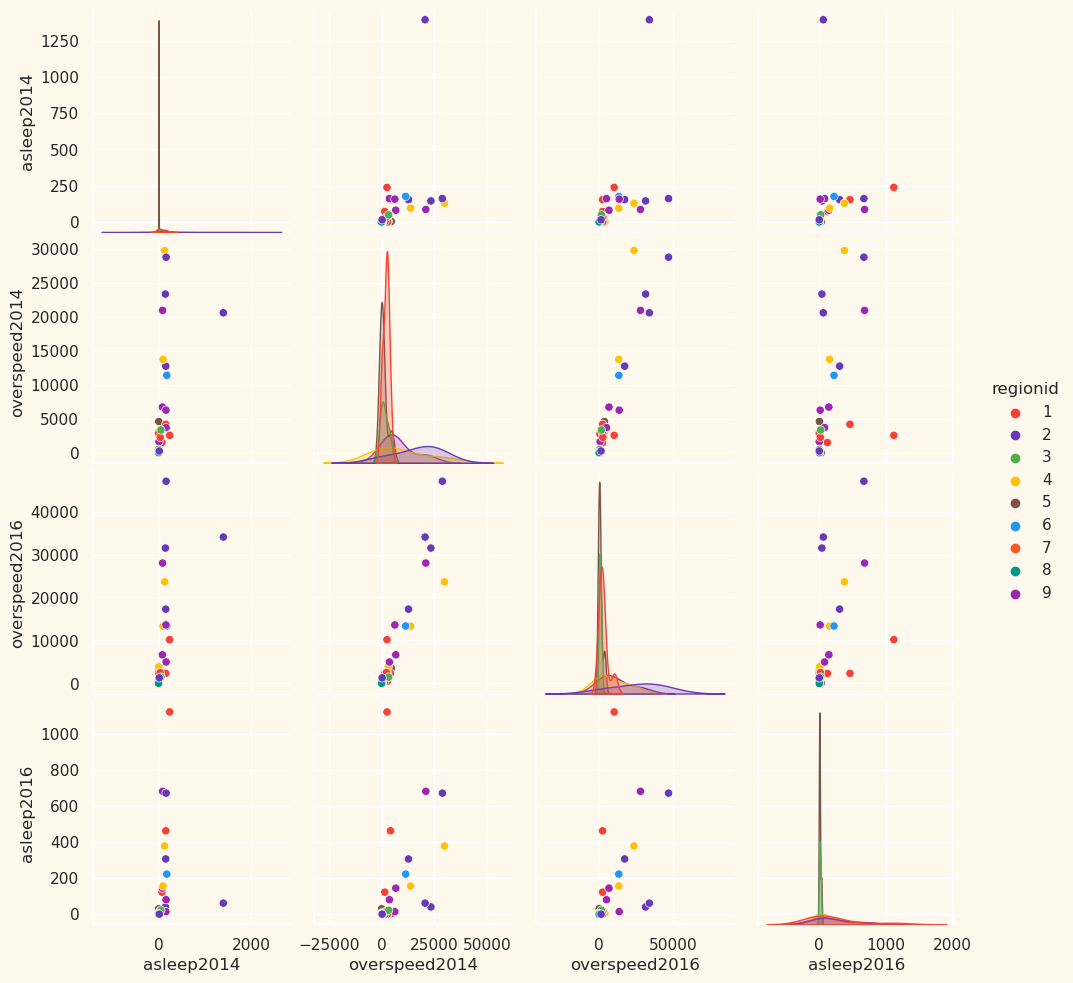

In [12]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "regionid", "asleep2014","overspeed2014","overspeed2016","asleep2016"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(Data[To_Plot], hue= "regionid",palette= (["#F44336","#673AB7","#4CAF50","#FFC107","#795548","#2196F3","#FF5722","#009688","#9C27B0"]))
#Taking hue 
plt.show()

<AxesSubplot:>

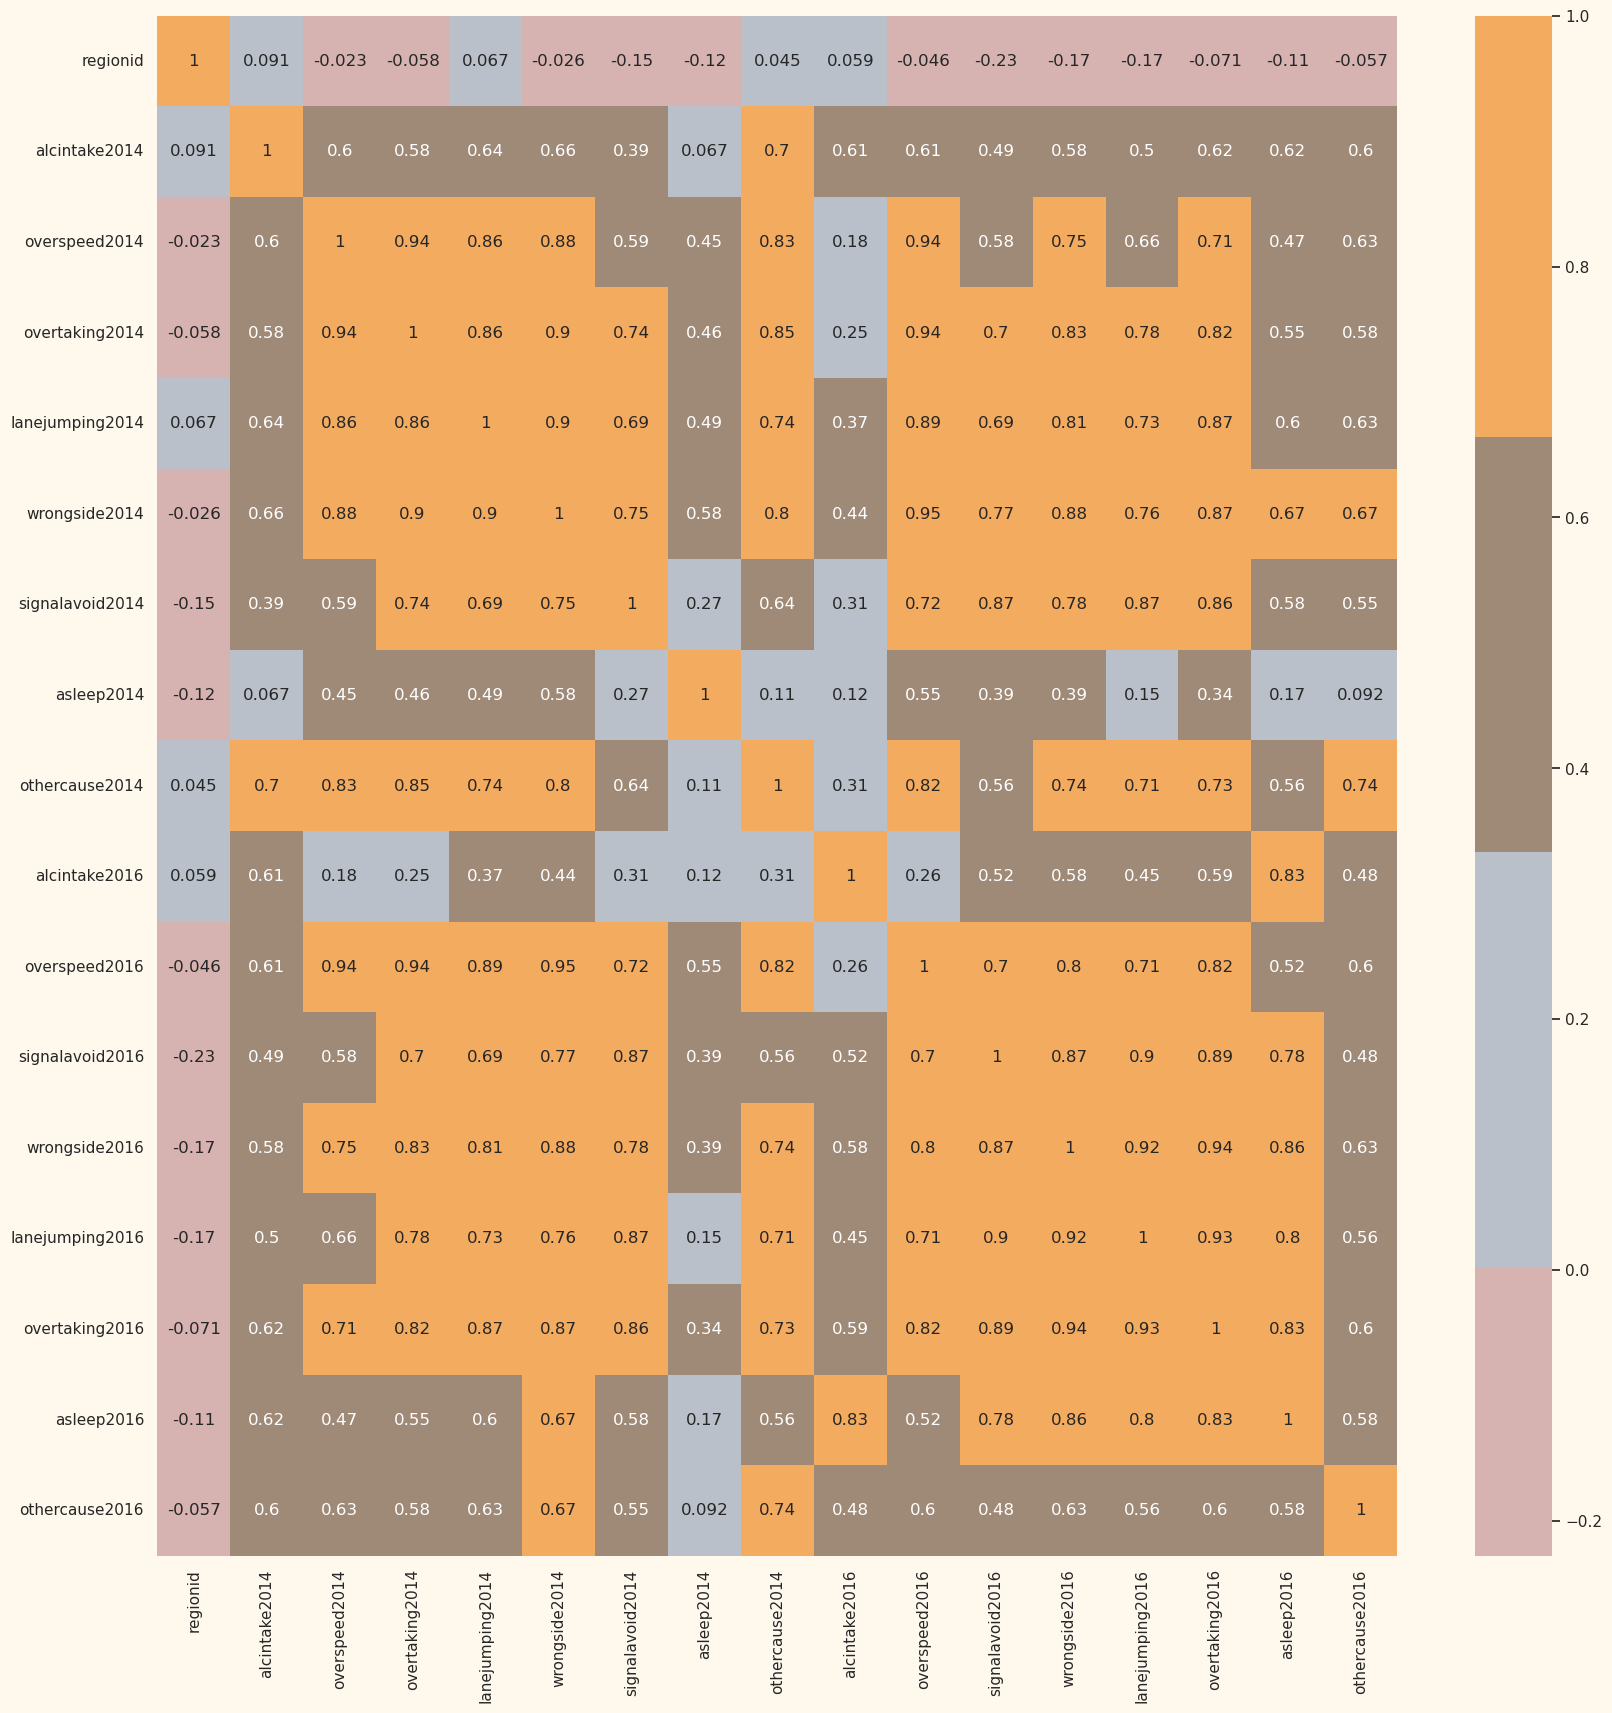

In [13]:

#Ploting to find the ccorrelation between datas
corrmat= Data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

By analysing the above correlation  data (from the heat map) we could see the data of overspeeding have more data points. 

In [14]:
#Get list of categorical variables
s = (Data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['stateut', 'region']


Chnaging all the values to NUMERIACL, for easier analysis:

In [15]:
#Label Encoding the object dtypes, for changing to numerical form
LE=LabelEncoder()
for i in object_cols:
    Data[i]=Data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [16]:
Data.head()

,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
0,1,5,2,594,12747.0,507,328,668,29,154,1938,128,17286,40,667,325,1024,306,2868
1,2,3,5,11,16.0,0,0,0,0,0,22,15,45,0,7,11,8,8,18
2,3,3,5,613,4596.0,129,104,156,7,3,628,352,3520,64,334,156,371,3,873
3,4,2,1,1680,1496.0,278,236,308,7,72,439,593,2323,8,458,156,573,122,612
4,6,0,9,335,6720.0,188,313,266,10,81,520,145,6660,62,410,175,467,144,953


In [17]:
#A 3D Projection of the data exclusive for alcohol intake
from mpl_toolkits.mplot3d import Axes3D

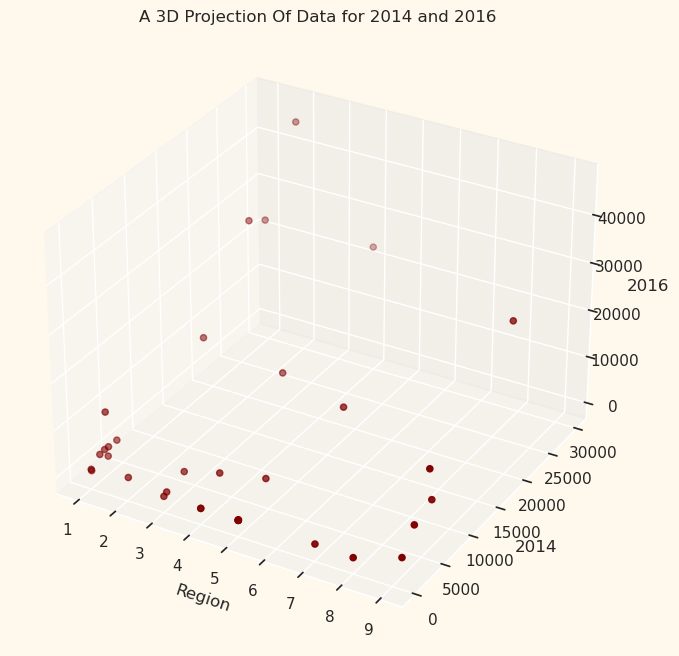

In [18]:
# Extract columns 'region_ID', 'overspeed2014' and 'overspeed2016' from the dataframe

x = Data['regionid']
y = Data['overspeed2014']
z = Data['overspeed2016']
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data for 2014 and 2016")

ax.set_xlabel('Region')
ax.set_ylabel('2014')
ax.set_zlabel('2016')

plt.show()


In [19]:
#choosing the annunal region_Id column and over speed accidental of 2014 column 
x= Data.iloc[:,[2,7]].values

In [20]:
#WCSS - Within cluster sum of squares for different number of cluster, 11 = in n-1, so 10

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

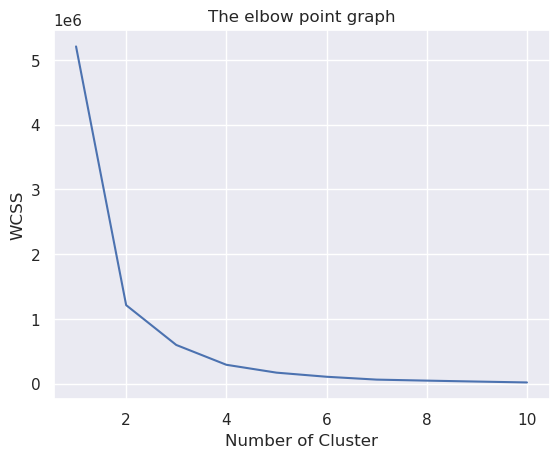

In [21]:
#plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [22]:
#in the above graph we have two elbow point, we will take 3, after 3 there is no significant drope 
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
y = kmeans.fit_predict(x)
print(y)

[0 1 1 1 1 1 0 0 1 1 1 0 2 0 0 1 1 1 1 0 1 0 1 2 0 1 1 0 1 1 1 1 1 1 1]


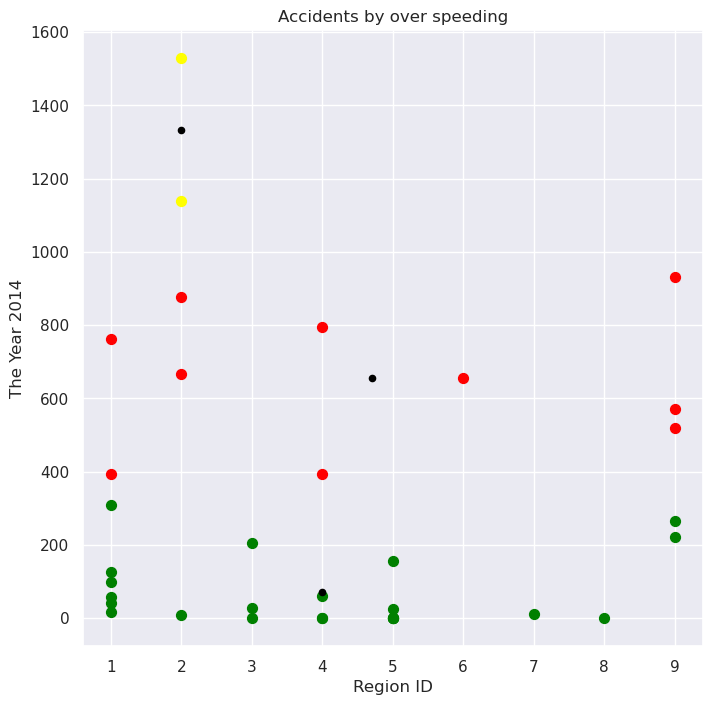

In [23]:
#visualizing the cluster

plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s=50, c='Red', label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1], s=50, c='Green', label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1], s=50, c='Yellow', label='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=20, c='Black', label='Centroids')

plt.title('Accidents by over speeding')
plt.xlabel('Region ID')
plt.ylabel('The Year 2014')
plt.show()

<AxesSubplot:xlabel='regionid', ylabel='overtaking2014'>

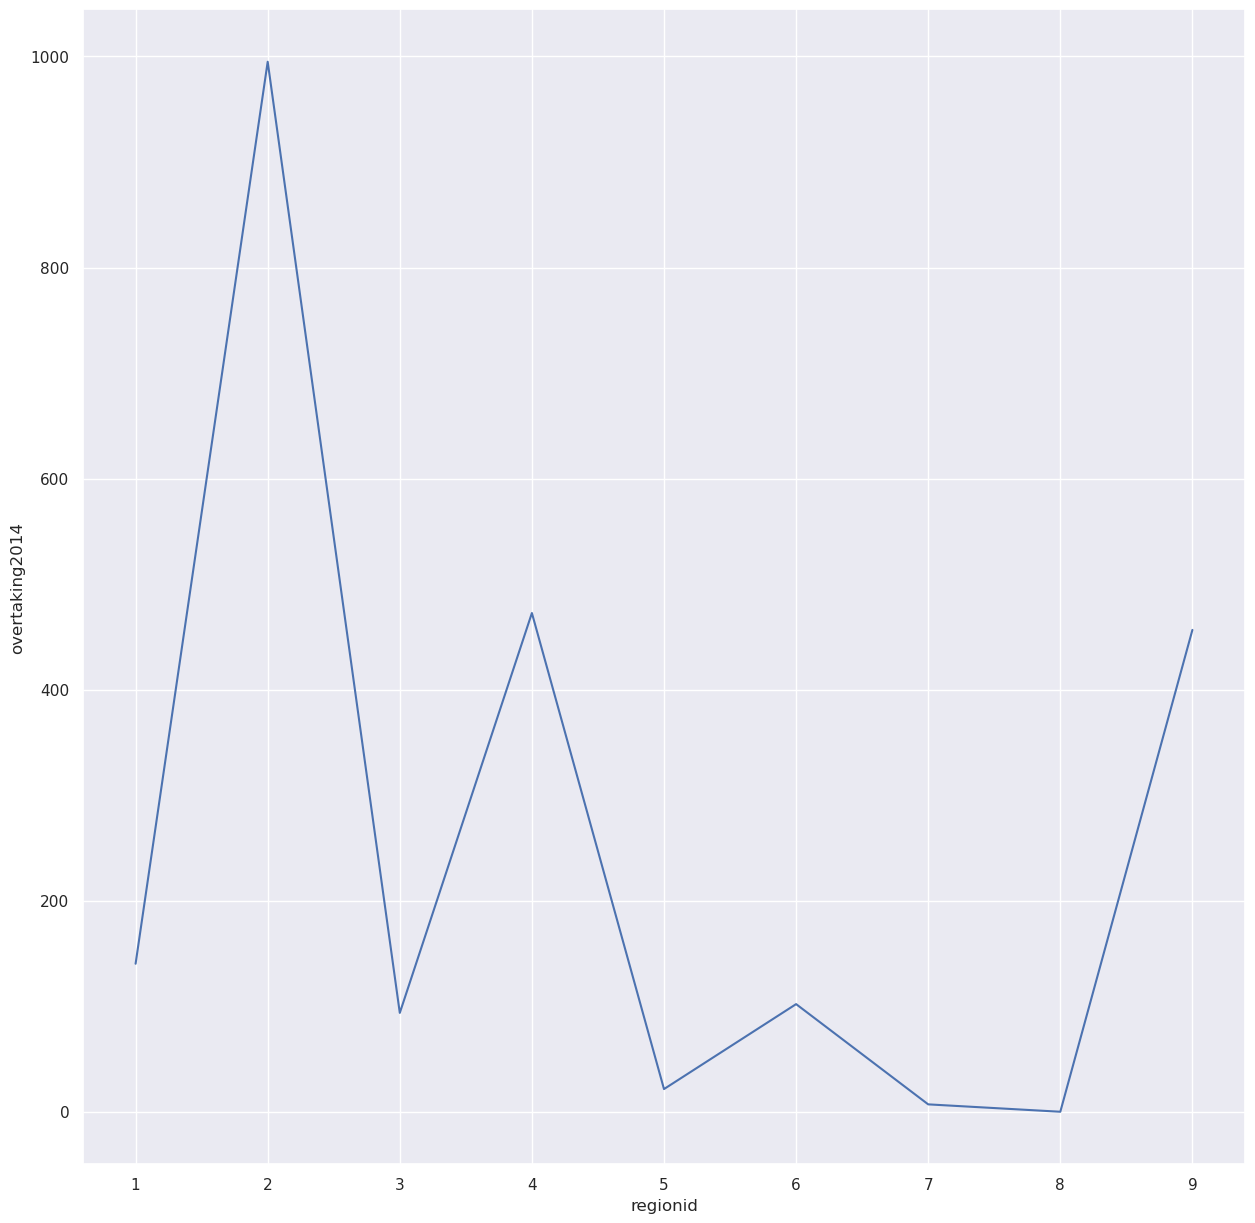

In [24]:
plt.figure(figsize=(15,15))
sns.lineplot(x="regionid", y="overtaking2014", data=Data.groupby("region").mean())

Conclusion: 

By analysing the above graphs we could conclude that accidental rate is higher for the region ID 1,2 and 4. We could also conclude that more accident rates occur due to overspeeding.  